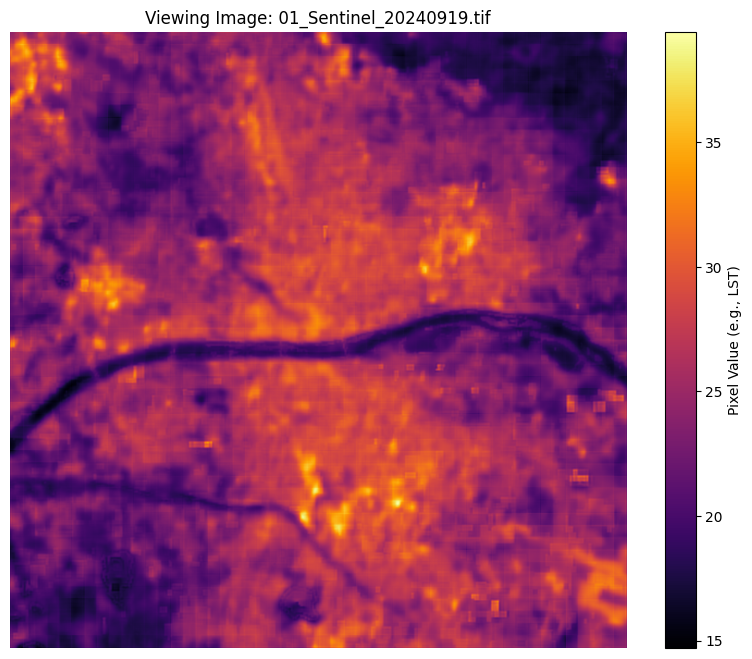

In [1]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def view_tif_image(image_path):
    """
    Loads a .tif image from a local path and displays it.

    Args:
        image_path (str): The full path to the .tif image file.
    """
    if not os.path.exists(image_path):
        print(f"Error: The image file was not found at {image_path}")
        return

    try:
        # Use rasterio to open the .tif file
        with rasterio.open(image_path) as src:
            # Read the first band of the image data
            # Assuming it's a single-channel image like LST
            data = src.read(1)
            
            # Create a figure and axes for plotting
            plt.figure(figsize=(10, 8))
            
            # Use 'inferno' or another suitable colormap for temperature data
            plt.imshow(data, cmap='inferno')
            
            # Add a color bar for value reference
            plt.colorbar(label='Pixel Value (e.g., LST)')
            
            plt.title(f"Viewing Image: {os.path.basename(image_path)}")
            plt.xlabel("X Coordinate")
            plt.ylabel("Y Coordinate")
            plt.axis('off') # Turn off the axes for a cleaner view
            plt.show()

    except rasterio.RasterioIOError as e:
        print(f"Error reading the file. Is it a valid GeoTIFF? Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # --- Instructions for Use ---
    # 1. Replace the placeholder path below with the actual location of your .tif file.
    # 2. Make sure you have the required libraries installed:
    #    pip install rasterio matplotlib numpy
    
    # EXAMPLE USAGE:
    # Replace the path below with your local file's path
    LOCAL_IMAGE_PATH = r'C:\Users\BIT\OneDrive - Birla Institute of Technology\Desktop\PROJECTS\Air-Quality\WGAST\WGAST_TRAINING_OUTPUT\Tdivision\test\01_Sentinel_20240919.tif'
    
    view_tif_image(LOCAL_IMAGE_PATH)

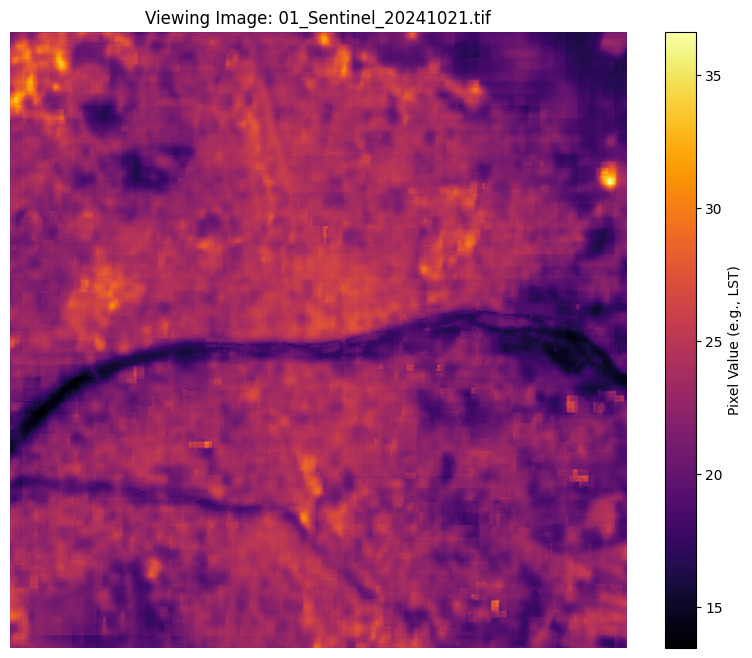

In [2]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def view_tif_image(image_path):
    """
    Loads a .tif image from a local path and displays it.

    Args:
        image_path (str): The full path to the .tif image file.
    """
    if not os.path.exists(image_path):
        print(f"Error: The image file was not found at {image_path}")
        return

    try:
        # Use rasterio to open the .tif file
        with rasterio.open(image_path) as src:
            # Read the first band of the image data
            # Assuming it's a single-channel image like LST
            data = src.read(1)
            
            # Create a figure and axes for plotting
            plt.figure(figsize=(10, 8))
            
            # Use 'inferno' or another suitable colormap for temperature data
            plt.imshow(data, cmap='inferno')
            
            # Add a color bar for value reference
            plt.colorbar(label='Pixel Value (e.g., LST)')
            
            plt.title(f"Viewing Image: {os.path.basename(image_path)}")
            plt.xlabel("X Coordinate")
            plt.ylabel("Y Coordinate")
            plt.axis('off') # Turn off the axes for a cleaner view
            plt.show()

    except rasterio.RasterioIOError as e:
        print(f"Error reading the file. Is it a valid GeoTIFF? Error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # --- Instructions for Use ---
    # 1. Replace the placeholder path below with the actual location of your .tif file.
    # 2. Make sure you have the required libraries installed:
    #    pip install rasterio matplotlib numpy
    
    # EXAMPLE USAGE:
    # Replace the path below with your local file's path
    LOCAL_IMAGE_PATH = r'C:\Users\BIT\OneDrive - Birla Institute of Technology\Desktop\PROJECTS\Air-Quality\WGAST\WGAST_TRAINING_OUTPUT\Tdivision\test\01_Sentinel_20241021.tif'
    
    view_tif_image(LOCAL_IMAGE_PATH)

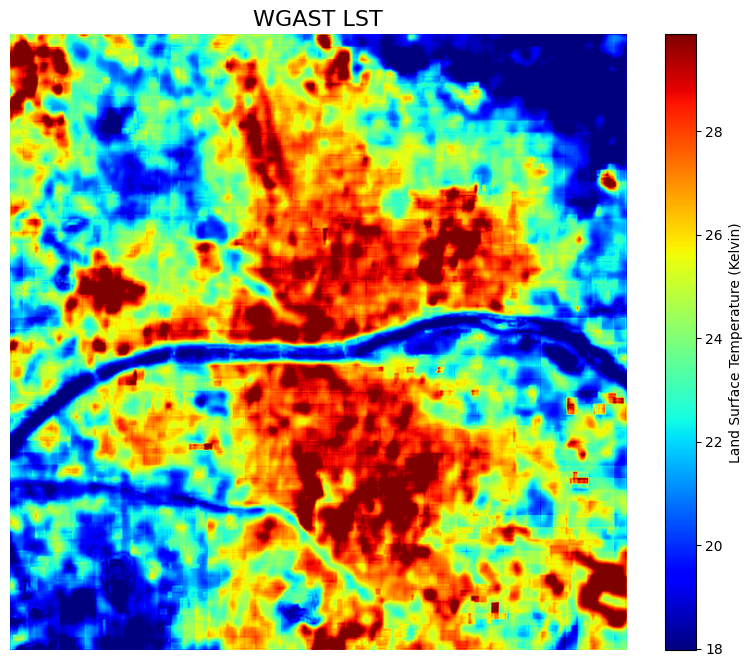

In [3]:
import os
import rasterio
import matplotlib.pyplot as plt
import numpy as np

def view_tif_image_styled(image_path, title="WGAST LST"):
    """
    Loads a .tif image and displays it with a colormap resembling the provided example,
    with blue for low values and red/yellow for high values.

    Args:
        image_path (str): The full path to the .tif image file.
        title (str): The title to display above the image.
    """
    if not os.path.exists(image_path):
        print(f"Error: The image file was not found at {image_path}")
        return

    try:
        with rasterio.open(image_path) as src:
            data = src.read(1)
            
            # Ensure the data is 2D
            data = np.squeeze(data)
            if data.ndim != 2:
                raise ValueError("Image data is not a 2D array.")

            plt.figure(figsize=(10, 8))
            
            # --- Custom Colormap Approximation ---
            # 'jet' or 'Spectral_r' are good approximations for the blue-green-yellow-red style.
            # 'jet' goes from blue to red, similar to your example.
            # 'Spectral_r' is reversed spectral, also similar.
            
            # You might need to adjust min/max based on your LST range
            # For LST in Kelvin, typical range could be 273 (0C) to 323 (50C)
            # Adjust these min/max values based on the actual range of your data
            vmin_data = np.percentile(data[data > 0], 5)  # 5th percentile for min, ignoring 0s
            vmax_data = np.percentile(data[data > 0], 95) # 95th percentile for max, ignoring 0s

            # If you want to force specific min/max for visual consistency, uncomment these:
            # vmin_data = 285 # Example min Kelvin
            # vmax_data = 315 # Example max Kelvin
            
            im = plt.imshow(data, cmap='jet', vmin=vmin_data, vmax=vmax_data)
            
            # Add a color bar
            cbar = plt.colorbar(im, label='Land Surface Temperature (Kelvin)')
            # You might want to format the colorbar ticks if they are too dense or not meaningful
            # cbar.set_ticks(np.linspace(vmin_data, vmax_data, num=5)) # Example: 5 ticks
            
            plt.title(title, fontsize=16)
            plt.axis('off') # Turn off axes for a cleaner view like your example
            plt.show()

    except rasterio.RasterioIOError as e:
        print(f"Error reading the file. Is it a valid GeoTIFF? Error: {e}")
    except ValueError as e:
        print(f"Data error: {e}")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

if __name__ == "__main__":
    # --- Instructions for Use ---
    # 1. Replace the placeholder path below with the actual location of your .tif file.
    # 2. Make sure you have the required libraries installed:
    #    pip install rasterio matplotlib numpy
    
    # EXAMPLE USAGE:
    # Replace the path below with your local file's path
    LOCAL_IMAGE_PATH = r'C:\Users\BIT\OneDrive - Birla Institute of Technology\Desktop\PROJECTS\Air-Quality\WGAST\WGAST_TRAINING_OUTPUT\Tdivision\test\01_Sentinel_20240919.tif'
    
    view_tif_image_styled(LOCAL_IMAGE_PATH)